In [0]:
# Impoortation des bibliotheque
import pandas as pd

In [0]:
# importation des donnees
fromage = pd.read_table("/fromage.txt", sep="\t", header=0, index_col=0)
print(fromage.shape)

(29, 9)


In [0]:
#statistiques descriptives
print(fromage.describe())

         calories      sodium     calcium  ...  proteines  cholesterol  magnesium
count   29.000000   29.000000   29.000000  ...  29.000000    29.000000  29.000000
mean   300.034483  210.086207  185.734483  ...  20.168966    74.586207  26.965517
std     91.914356  108.678923   72.528882  ...   6.959788    28.245755  11.318388
min     70.000000   22.000000   72.600000  ...   4.100000    10.000000  10.000000
25%    292.000000  140.000000  132.900000  ...  17.800000    70.000000  20.000000
50%    321.000000  223.000000  202.300000  ...  21.000000    80.000000  26.000000
75%    355.000000  276.000000  220.500000  ...  23.400000    90.000000  30.000000
max    406.000000  432.000000  334.600000  ...  35.700000   120.000000  51.000000

[8 rows x 9 columns]


In [0]:
#
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [0]:
fromage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, CarredelEst to Yaourtlaitent.nat.
Data columns (total 9 columns):
calories       29 non-null int64
sodium         29 non-null float64
calcium        29 non-null float64
lipides        29 non-null float64
retinol        29 non-null float64
folates        29 non-null float64
proteines      29 non-null float64
cholesterol    29 non-null int64
magnesium      29 non-null int64
dtypes: float64(6), int64(3)
memory usage: 2.3+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff176657320>,
      dtype=object)

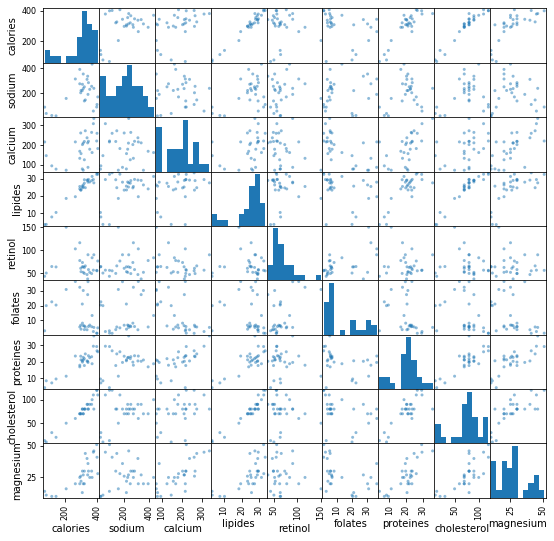

In [0]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(fromage,figsize=(9,9))

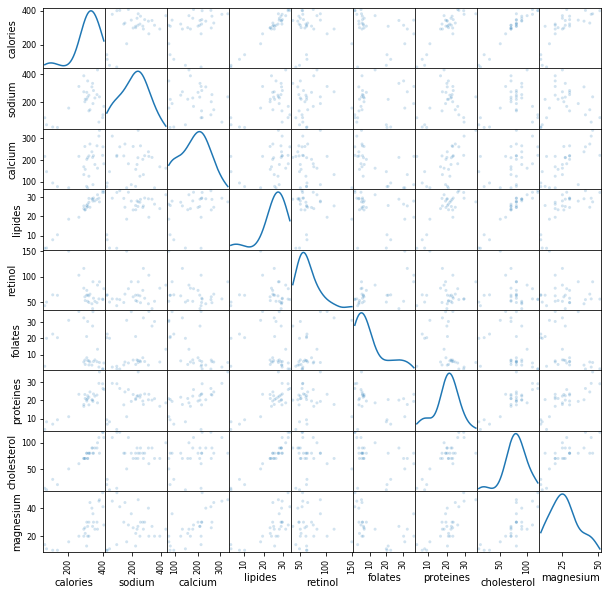

In [0]:
scatter_matrix(fromage, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

Classificationascendate hierachique

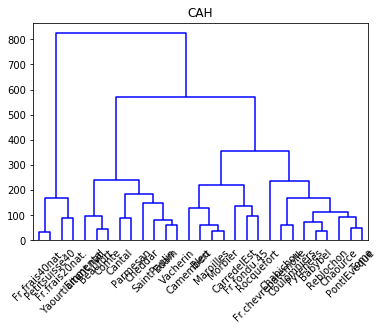

In [0]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#générer la matrice des liens
Z = linkage(fromage,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='top',color_threshold=0)
plt.show()

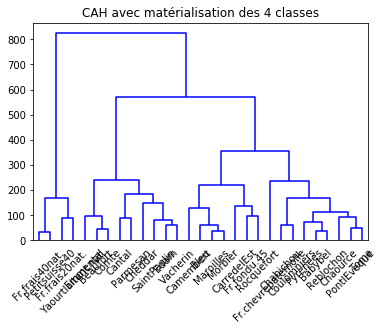

In [0]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='top',color_threshold=7)
plt.show()

In [0]:
import scipy.cluster.hierarchy as sch
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus
groupes_cah = sch.fcluster(Z,t=7,criterion='distance')
print(groupes_cah)
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))

[20 23  5 16 17  8 21 28 13  6 22 10  7 29 18  3  1 14 15  9  2 26 25 24
 19 12 27 11  4]
              Fromages
1       Fr.frais40nat.
2        Petitsuisse40
3       Fr.frais20nat.
4   Yaourtlaitent.nat.
5             Beaufort
6                Comte
7             Emmental
8               Cantal
9             Parmesan
10                Edam
11            Vacherin
12         SaintPaulin
13             Cheddar
14           Maroilles
15             Morbier
16                Bleu
17           Camembert
18         Fr.fondu.45
19          Rocquefort
20         CarredelEst
21           Chabichou
22         Coulomniers
23             Babybel
24           Reblochon
25            Pyrenees
26         PontlEveque
27                Tome
28            Chaource
29  Fr.chevrepatemolle


Kmeas

In [0]:
#k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(fromage)
#index triés des groupes
idk = np.argsort(kmeans.labels_)
#affichage des observations et leurs groupes
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))

             Fromages
0  Yaourtlaitent.nat.
0       Petitsuisse40
0      Fr.frais40nat.
0      Fr.frais20nat.
1            Parmesan
1            Vacherin
1            Emmental
1               Comte
1                Edam
1              Cantal
1         SaintPaulin
1            Beaufort
1             Cheddar
2            Chaource
2         Coulomniers
2         PontlEveque
2           Chabichou
2  Fr.chevrepatemolle
2                Tome
2           Reblochon
2             Babybel
2            Pyrenees
3          Rocquefort
3         CarredelEst
3           Maroilles
3           Camembert
3                Bleu
3             Morbier
3         Fr.fondu.45


In [0]:
#distances aux centres de classes des observations
print(kmeans.transform(fromage))

[[384.27301005 276.97286581 144.16143429 113.93948537]
 [303.10311983 109.45910731  75.34258219 112.52314955]
 [349.91323389  64.69650991 202.52098443 262.07023439]
 [393.76898843 188.65876472 142.10128712  46.67154882]
 [332.43471728 201.10903222 126.47678848  88.99646404]
 [371.97076666  99.31689772 147.31320082 130.13216594]
 [298.65300308 181.02233918  78.60894932 185.69273172]
 [311.48990553 198.33428167  62.57447316 106.93328647]
 [348.48685233  90.3343884  130.02349028 195.56870341]
 [333.83554522  88.51701378 195.60244608 272.32407802]
 [285.29211565 200.77459046  63.37132389 163.4430588 ]
 [293.81905359  44.89833646 160.8106762  217.96814128]
 [343.1669947  112.7120301  255.96617229 319.12892251]
 [195.86579908 265.93180737 157.85450834 263.36846115]
 [400.47054979 261.12568825 164.2522052   60.31120991]
 [ 27.57918146 341.16243371 303.86057333 399.88724202]
 [ 48.43507252 335.70901017 288.04884852 397.30428862]
 [379.74839203 157.29417435 138.50715674  71.19691434]
 [360.8713

In [0]:
#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2,3
row_0,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


[0.50681355 0.37299771 0.3369907  0.32560235 0.30111135 0.3024253
 0.27937195 0.28259099 0.24792119]


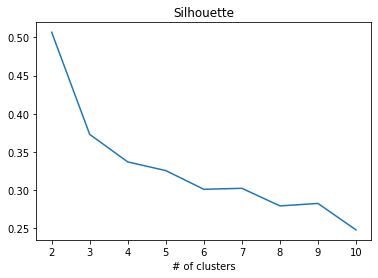

In [0]:
#librairie pour évaluation des partitions
from sklearn import metrics
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(9,dtype="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters=k+2)
  km.fit(fromage)
  res[k] = metrics.silhouette_score(fromage,km.labels_)
print(res)
#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),res)
plt.show()

In [0]:
#moyenne par variable
m = fromage.mean()
#TSS
TSS = fromage.shape[0]*fromage.var(ddof=0)
print(TSS)
#data.frame conditionnellement aux groupes
gb = fromage.groupby(kmeans.labels_)
#effectifs conditionnels
nk = gb.size()
print(nk)
#moyennes conditionnelles
mk = gb.mean()
print(mk)
#pour chaque groupe écart à la moyenne par variable
EMk = (mk-m)**2
#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)
#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)

calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64
0    4
1    9
2    9
3    7
dtype: int64
     calories      sodium     calcium  ...  proteines  cholesterol  magnesium
0  101.750000   44.750000  133.750000  ...   7.200000    18.250000  11.250000
1  364.222222  158.333333  257.800000  ...  26.166667    95.555556  37.888889
2  305.444444  229.666667  138.366667  ...  19.611111    74.444444  23.777778
3  323.857143  345.928571  183.685714  ...  20.585714    80.000000  26.000000

[4 rows x 9 columns]
calories       198583.580597
sodium         266072.070197
calcium         77773.266946
lipides          1553.684115
retinol          2434.621768
folates          1046.630825
proteines        1000.544609
cholesterol     16857.840038
magnesium        2159.771073
dtype: flo

ACP

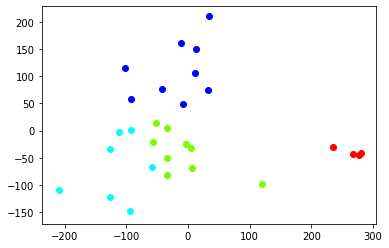

In [0]:
#ACP
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(fromage)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip() dans la boucle
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
  plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show() 

In [0]:
from sklearn import preprocessing
#retirer des observations le groupe n°0 du k-means précédent
fromage_subset = fromage.iloc[kmeans.labels_!=0,:]
print(fromage_subset.shape)

(25, 9)


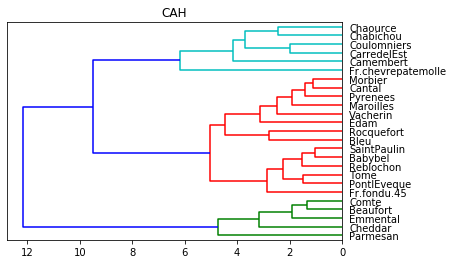

[3 2 1 2 3 2 3 3 1 1 3 2 1 3 2 2 2 1 2 2 2 2 2 2 2]


In [0]:
#centrer et réduire
fromage_subset_cr = preprocessing.scale(fromage_subset)
#générer la matrice des liens
Z_subset = linkage(fromage_subset_cr, method='ward',metric='euclidean')
#cah et affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_subset,labels=fromage_subset.index,orientation='left',color_threshold=7)
plt.show()
#groupes
groupes_subset_cah = sch.fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

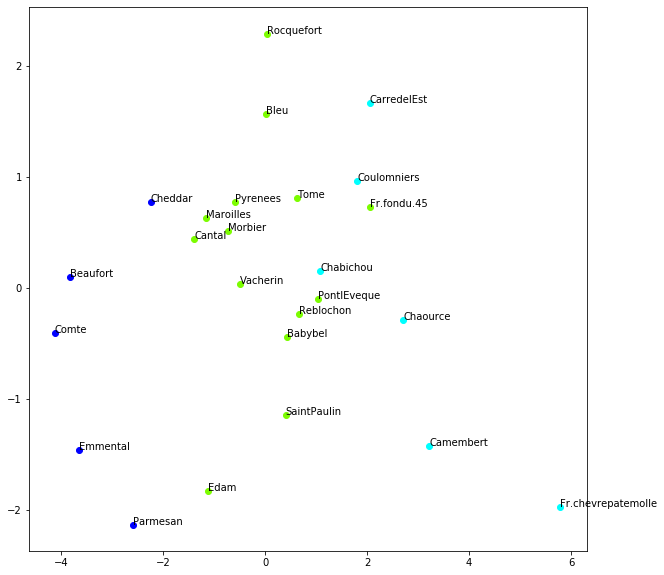

In [0]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
  plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(fromage_subset.index):
  plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show() 